In [ ]:
#Imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read data

In [ ]:
'''
Should be doing something like file = pd.read_csv(filepath in string format)
'''
file1 = pd.read_csv("/content/linear predictive model/ex2.txt",names=["size","n_rooms","price"])
data  = file1.values
data  = data.astype('float64')
print (data)
#normalization
data[:,0] = data[:,0]/data[:,0].max()
data[:,1] = data[:,1]/data[:,1].max()

[[2.10400e+03 3.00000e+00 3.99900e+05]
 [1.60000e+03 3.00000e+00 3.29900e+05]
 [2.40000e+03 3.00000e+00 3.69000e+05]
 [1.41600e+03 2.00000e+00 2.32000e+05]
 [3.00000e+03 4.00000e+00 5.39900e+05]
 [1.98500e+03 4.00000e+00 2.99900e+05]
 [1.53400e+03 3.00000e+00 3.14900e+05]
 [1.42700e+03 3.00000e+00 1.98999e+05]
 [1.38000e+03 3.00000e+00 2.12000e+05]
 [1.49400e+03 3.00000e+00 2.42500e+05]
 [1.94000e+03 4.00000e+00 2.39999e+05]
 [2.00000e+03 3.00000e+00 3.47000e+05]
 [1.89000e+03 3.00000e+00 3.29999e+05]
 [4.47800e+03 5.00000e+00 6.99900e+05]
 [1.26800e+03 3.00000e+00 2.59900e+05]
 [2.30000e+03 4.00000e+00 4.49900e+05]
 [1.32000e+03 2.00000e+00 2.99900e+05]
 [1.23600e+03 3.00000e+00 1.99900e+05]
 [2.60900e+03 4.00000e+00 4.99998e+05]
 [3.03100e+03 4.00000e+00 5.99000e+05]
 [1.76700e+03 3.00000e+00 2.52900e+05]
 [1.88800e+03 2.00000e+00 2.55000e+05]
 [1.60400e+03 3.00000e+00 2.42900e+05]
 [1.96200e+03 4.00000e+00 2.59900e+05]
 [3.89000e+03 3.00000e+00 5.73900e+05]
 [1.10000e+03 3.00000e+00

# data ploting

Text(0.5, 1.0, 'size plot')

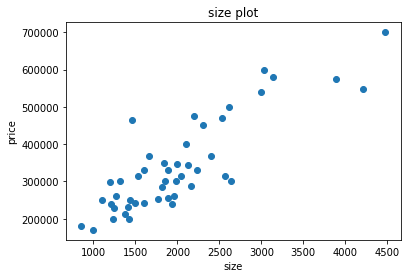

In [ ]:
plt.scatter(data[0:,0],data[0:,2])
plt.xlabel("size")
plt.ylabel("price")
plt.title("size plot")

Text(0.5, 1.0, 'number of rooms plot')

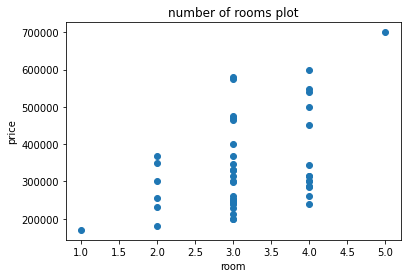

In [ ]:
plt.scatter(data[0:,1],data[0:,2])
plt.xlabel("room")
plt.ylabel("price")
plt.title("number of rooms plot")

# loss function 

In [ ]:
def CostFunc(Predictions,GroundTruth):
  m=len(GroundTruth)
  error=((1/(2*m))*np.sum((Predictions-GroundTruth)**2))
  return error

# Gradient decent

In [ ]:
def Gradient(x,GroundTruth,iterations):
  theta0=0.05
  theta=np.zeros((2,1))
  cost_li=[]
  m=len(GroundTruth)
  
  for i in range(iterations):
    predictions=theta0+np.dot(x,theta)
    d_theta0= np.sum(predictions-GroundTruth,axis=0)
    d_theta = np.sum(np.dot(x.T,predictions-GroundTruth),axis=0)

    theta0 = theta0-(0.001)*(1/m)*d_theta0
    theta  = theta -(0.001)*(1/m)*d_theta
    cost_li.append(CostFunc(predictions,GroundTruth))

  return theta0 , theta , cost_li



# Predictions and loss plot

In [ ]:
x=data[0:,0:2]
y=data[0:,2]
theta0,theta,cost_li = Gradient(x,y,1000)
predictions=theta0+np.dot(x,theta)
print(predictions)

[306806.01631121 288566.14436838 317518.32205541 249495.18057974
 371644.41824131 334911.34280089 286177.5897092  282305.23594356
 280604.29550445 284729.98082485 333282.782806   303042.2332119
 299061.30877993 457545.52943872 276550.99062826 346311.26276516
 246020.91925729 275392.90352078 357494.04139677 372766.31512668
 294609.91146055 266576.96541508 288710.90525682 334078.96769239
 371441.7529975  270471.03331399 283427.13282893 322078.29004112
 310280.27763365 326095.40469519 264803.64453175 202028.08526185
 336901.80501688 344190.51574959 328614.24415396 282667.13816465
 275501.47418711 340231.30545088 415615.53810349 341317.01211415
 258470.35566271 311655.50607379 355974.05206821 274090.05552487
 229083.89531038 330098.04326042 274198.62619119]


In [ ]:
file1["predictions"]=predictions
file1.head()

,size,n_rooms,price,predictions
0,2104,3,399900,306806.016311
1,1600,3,329900,288566.144368
2,2400,3,369000,317518.322055
3,1416,2,232000,249495.180580
4,3000,4,539900,371644.418241


Text(0.5, 1.0, 'loss plot')

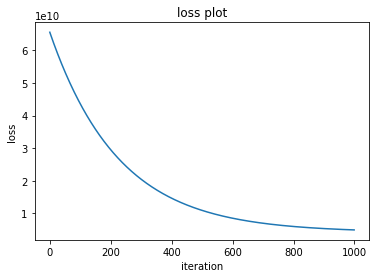

In [ ]:
plt.plot(cost_li)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title("loss plot")